In [1]:
'モジュールのインポート 1'

# numpyはインポートする必要はありませんが、頻繁に使用することになるでしょう
import numpy as np
# データのプロットに使用します
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'モジュールのインポート 2'

# MNISTデータセット
from tensorflow.contrib.keras.python.keras.datasets import mnist
# シーケンシャルモデル
from tensorflow.contrib.keras.python.keras.models import Sequential
# それぞれ平坦化層、全結合層、活性化層
from tensorflow.contrib.keras.python.keras.layers import Flatten, Dense, Activation
# numpyアレイの便利な取り扱い
from tensorflow.contrib.keras.python.keras.utils import np_utils
# tensorflowのバックエンドエンジン
from tensorflow.contrib.keras.api.keras import backend as K

In [3]:
'データセットの読み込み'

# MNISTデータセットダウンロードし、読み込みます
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# 訓練データ、評価データの入力データ、教師データの構造を確認します
print('x_train :', x_train.shape)
print('y_train :', y_train.shape)
print('x_test :', x_test.shape)
print('y_test :', y_test.shape)

x_train : (60000, 28, 28)
y_train : (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)


In [5]:
'入力データを画像として表示する関数を定義'

def show_samples(samples):
    """
    入力：
        samples - numpy.ndarray
    出力：
        None
    """
    num_samples = samples.shape[0]
    # サンプル画像の枚数分のプロット領域を作り、位置を調整します
    fig, axs = plt.subplots(1,num_samples, figsize=(18,2))
    fig.subplots_adjust(wspace=.05)
    axs = axs.ravel()
    for i in range(num_samples):
        # サンプル画像をプロット領域に描画します
        axs[i].imshow(samples[i], cmap='gray')
        # 縦横の軸を消します
        axs[i].set_xticks([])
        axs[i].set_yticks([])
    # プロットを表示します
    plt.show()

[7 2 1 0 4 1 4 9 5 9]


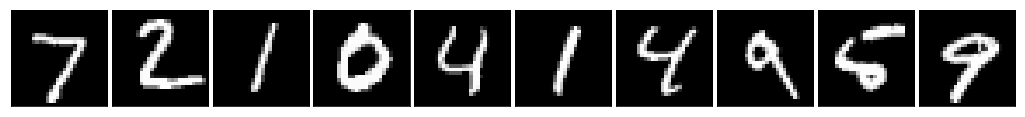

In [6]:
'データセットの確認'

# はじめの10サンプル分を選びます
indexes = np.arange(0,10)
# 以下のように、直接番号で指定することもできます
# indexes = [0,1,2,3,4,5,6,7,8,9]
# 選んだサンプルの教師ラベルを表示します
print(y_test[indexes])
# 選んだサンプルの入力データを表示します
show_samples(x_test[indexes])

In [7]:
'1ホットベクトルへの変換'

# np_udilsから教師ラベルを1ホットベクトルに変換します
y_train_1hot = np_utils.to_categorical(y_train)
y_test_1hot = np_utils.to_categorical(y_test)
# 変換後のデータの構造を確認します
print('y_train_1hot :', y_train_1hot.shape)
print('y_test_1hot :', y_test_1hot.shape)

y_train_1hot : (60000, 10)
y_test_1hot : (10000, 10)


In [8]:
# 1ホットベクトル形式を確認します
index = 0
print(y_test[index])
print(y_test_1hot[index])

7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


In [9]:
'ニューラルネットワークモデルの構築'

# 入力データの形式と教師データのラベル数を取得します
input_shape = x_train.shape[1:]
num_labels =  y_train_1hot.shape[-1]

# シーケンシャルモデルのインスタンスを作ります
model = Sequential()
# 入力データを平坦化する層を追加します
model.add(Flatten(input_shape =input_shape))
# 全結合層を追加します
model.add(Dense(num_labels))
# 全結合層の出力をソフトマックス関数で活性化します
model.add(Activation('softmax'))

In [10]:
# モデルの概要を表示します
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [11]:
'モデルの学習アルゴリズムの設定'

model.compile(
    # 更新方法に「AdaDelta」を設定します
    optimizer='adadelta',
    # 損失関数に「CrossEntropy」を設定します
    loss='categorical_crossentropy',
    # 学習過程で認識精度を表示します
    metrics=['accuracy'])

In [12]:
'モデルの学習'

history = model.fit(
    # 訓練データを指定します
    x_train, y_train_1hot, 
    # ミニバッチ処理のバッチサイズを設定します
    batch_size=100,
    # 学習エポック数を設定します
    epochs=50,
    # 評価データを指定します
    validation_data=(x_test, y_test_1hot),
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s - loss: 8.4779 - acc: 0.4596 - val_loss: 6.2079 - val_acc: 0.6032
Epoch 2/50
60000/60000 [==============================] - 1s - loss: 4.9441 - acc: 0.6793 - val_loss: 3.1273 - val_acc: 0.7906
Epoch 3/50
60000/60000 [==============================] - 1s - loss: 2.5677 - acc: 0.8266 - val_loss: 2.0767 - val_acc: 0.8594
Epoch 4/50
60000/60000 [==============================] - 1s - loss: 2.0320 - acc: 0.8623 - val_loss: 1.8446 - val_acc: 0.8733
Epoch 5/50
60000/60000 [==============================] - 1s - loss: 1.8167 - acc: 0.8766 - val_loss: 1.6378 - val_acc: 0.8879
Epoch 6/50
60000/60000 [==============================] - 1s - loss: 1.6850 - acc: 0.8863 - val_loss: 1.5572 - val_acc: 0.8943
Epoch 7/50
60000/60000 [==============================] - 1s - loss: 1.5945 - acc: 0.8911 - val_loss: 1.5470 - val_acc: 0.8941
Epoch 8/50
60000/60000 [==============================] - 1s 

10/10 [==============================] - 0s
predictions : [7 2 1 0 4 1 4 9 6 9]
answers      : [7 2 1 0 4 1 4 9 5 9]


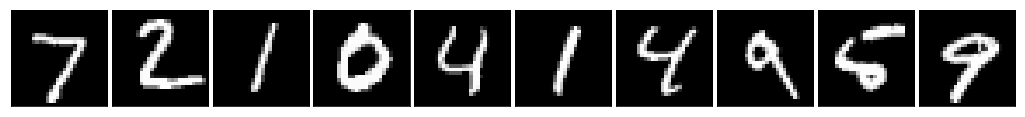

In [13]:
'学習済みモデルの利用'

# 評価データから10個のサンプルを取得します
indexes = np.arange(0,10)
samples = x_test[indexes]
# 選んだサンプルデータをモデルに入力し、識別結果を取得します
predictions = model.predict_classes(x_test[indexes])
# 正解データと比較をします
answers = y_test[indexes]
print('predictions :', predictions)
print('answers      :', answers)
show_samples(samples)